[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kshitijrajsharma/ersip-sprint/blob/master/sprints/1/3%20-%20Max-tree%20and%20attribute%20filtering.ipynb)

In [14]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Max-tree and attribute filtering

![](img/max_pruning.png)

In [ ]:
! wget https://github.com/kshitijrajsharma/ersip-sprint/raw/master/static/data.zip
! unzip data.zip
! rm data.zip

## 0. Setup: Load the DSM tile

- Load the dsm tile `tile_path` 

In [16]:
tile_path = Path('data/dsm_vox_50cm_tile_-12_0.tif')
dsm = rio.open(tile_path).read(1)
print(f"DSM shape: {dsm.shape}")
print(f"DSM dtype: {dsm.dtype}")


RasterioIOError: data/dsm_vox_50cm_tile_-12_0.tif: No such file or directory

## 1. Create the max-tree of the DSM with the Python package `sap`

- Create the max-tree of `dsm` (tip: don't forget that you can display docstrings with `?<package>`!)
- How many nodes have the max-tree?

In [ ]:
max_tree = sap.MaxTree(dsm)
print(f"Number of nodes in max-tree: {max_tree.num_nodes()}")

Number of nodes in max-tree: 6119633


## 2. Compute some attributes on the max-tree

- Get the nodes `area` attribute in a vector.
- Get the nodes `compactness` attributes.
- What is the size of the attribute vectors? Why?

In [ ]:
area = max_tree.get_attribute('area')
compactness = max_tree.get_attribute('compactness')
print(f"Area attribute size: {len(area)}")
print(f"Compactness attribute size: {len(compactness)}")
print(f"The attribute vectors have the same size as the number of nodes: {max_tree.num_nodes()}")
print(f"Each node in the tree has corresponding attribute values.")



Area attribute size: 6119633
Compactness attribute size: 6119633
The attribute vectors have the same size as the number of nodes: 6119633
Each node in the tree has corresponding attribute values.


## 3. Filter the DSM with attribute filtering!

We'll filter the DTM with a threshold on the area attributes.

+ Choose an area threshold
+ Get the vector of deleted nodes
+ Filter the tree according to the vector of deleted nodes
+ Display!

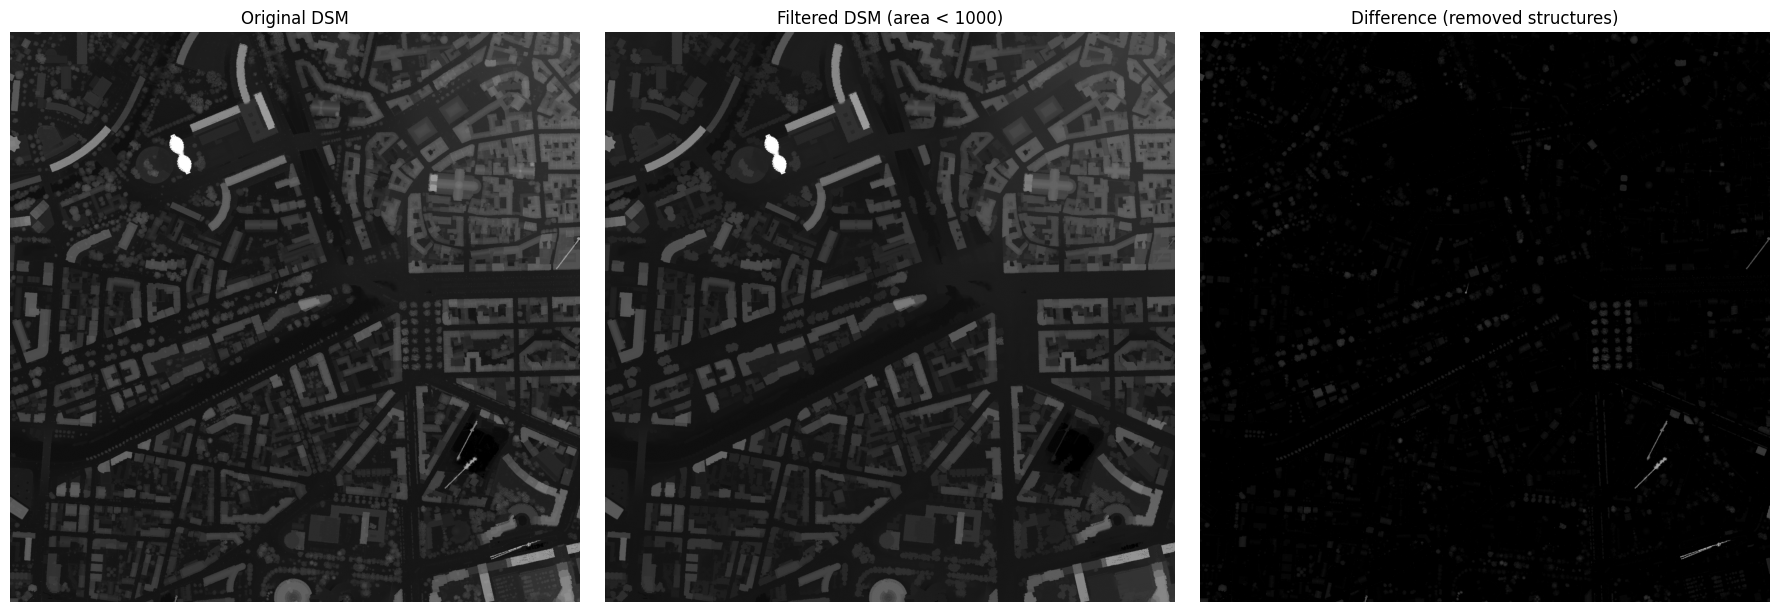

In [ ]:
area_threshold = 1000
deleted_nodes = area < area_threshold
filtered_dsm = max_tree.reconstruct(deleted_nodes)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(dsm, cmap='gray')
axes[0].set_title('Original DSM')
axes[0].axis('off')

axes[1].imshow(filtered_dsm, cmap='gray')
axes[1].set_title(f'Filtered DSM (area < {area_threshold})')
axes[1].axis('off')

axes[2].imshow(dsm - filtered_dsm, cmap='gray')
axes[2].set_title('Difference (removed structures)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

